# Document Classification

In [94]:
import pandas as pd
from sqlalchemy import create_engine
from collections import defaultdict
from IPython.core.display import display, HTML
from configparser import ConfigParser, ExtendedInterpolation
from IPython.display import Image

In [2]:
# configuration for data, acronyms, and gensim paths
config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')

DB_PATH = config['DATABASES']['PROJECT_DB_PATH']
AIRLINE_ACRONYMS_FILEPATH = config['NLP']['AIRLINE_ACRONYMS_FILEPATH']
AIRLINE_MATCHED_TEXT_PATH = config['NLP']['AIRLINE_MATCHED_TEXT_PATH']
AIRLINE_CLEANED_TEXT_PATH = config['NLP']['AIRLINE_CLEANED_TEXT_PATH']
GENSIM_DICTIONARY_PATH = config['NLP']['GENSIM_DICTIONARY_PATH']
GENSIM_CORPUS_PATH = config['NLP']['GENSIM_CORPUS_PATH']

In [5]:
engine = create_engine(DB_PATH)
df = pd.read_sql("SELECT * FROM Sections", con=engine)
df.head()

,section_id,filename,section_name,section_text,criteria,section_length
0,1,southwest-airlines-co_annual_report_1994.docx,FIRST SECTION,© 1994 Southwest Airlines Co. This annual repo...,<function heading at 0x000001D4AA492EA0>,83
1,2,southwest-airlines-co_annual_report_1994.docx,TABLE OF CONTENTS CONSOLIDATED HIGHLIGHTS,(Dollars in thousands except per share amounts...,<function heading at 0x000001D4AA492EA0>,113
2,3,southwest-airlines-co_annual_report_1994.docx,NET INCOME NET INCOME PER SHARE LOW FARES,"Southwest Airlines was built, from the ground ...",<function heading at 0x000001D4AA492EA0>,1553
3,4,southwest-airlines-co_annual_report_1994.docx,TO OUR SHAREHOLDERS,"In 1994, Southwest Airlines produced a profit ...",<function heading at 0x000001D4AA492EA0>,4862
4,5,southwest-airlines-co_annual_report_1994.docx,LOW COST,Southwest has the lowest cost structure among ...,<function heading at 0x000001D4AA492EA0>,2393


In [30]:
df['year'] = df['filename'].apply(lambda x: int(x.split('.')[0][-4:]))
df.head()

,section_id,filename,section_name,section_text,criteria,section_length,year
0,1,southwest-airlines-co_annual_report_1994.docx,FIRST SECTION,© 1994 Southwest Airlines Co. This annual repo...,<function heading at 0x000001D4AA492EA0>,83,1994
1,2,southwest-airlines-co_annual_report_1994.docx,TABLE OF CONTENTS CONSOLIDATED HIGHLIGHTS,(Dollars in thousands except per share amounts...,<function heading at 0x000001D4AA492EA0>,113,1994
2,3,southwest-airlines-co_annual_report_1994.docx,NET INCOME NET INCOME PER SHARE LOW FARES,"Southwest Airlines was built, from the ground ...",<function heading at 0x000001D4AA492EA0>,1553,1994
3,4,southwest-airlines-co_annual_report_1994.docx,TO OUR SHAREHOLDERS,"In 1994, Southwest Airlines produced a profit ...",<function heading at 0x000001D4AA492EA0>,4862,1994
4,5,southwest-airlines-co_annual_report_1994.docx,LOW COST,Southwest has the lowest cost structure among ...,<function heading at 0x000001D4AA492EA0>,2393,1994


### Document Classification

- Identify any section that will discuss fees in the section text, by making a prediction on the section name

In [43]:
# set the labels
df['contains_fee'] = df['section_text'].str.contains('fee')
df['contains_fee'].value_counts()

False    2632
True      178
Name: contains_fee, dtype: int64

### Data Labeling

In [ ]:
- exercise: ask everyone to label the same data under different scenarios
    - differing opinion (lack of clear, consistent rules to follow)
    - incentive (for a specific role)
    - lack of knowledge (provide poor instructions)
    - lack of interest (provide time limit to answer)
    - bad data (word feel includes fee)

##### We are conducting an analysis of fees at Southwest Airlines. Should we include the following paragraph in the analysis (1-10 scale)

- lack of knowledge (provide poor instructions - no scale labels for 1 to 10)
- differing opinion (lack of clear, consistent rules to follow)

"Other operating expenses consist of distribution costs, advertising expenses, personnel expenses, professional fees, and other operating costs, none of which individually exceed 10 percent of Operating expenses."


##### We are conducting an analysis of fees at Southwest Airlines. Should we include the following paragraph in the analysis (1-10 scale)

In addition to the credit facilities described above, Southwest has an unsecured Bank Credit Agreement with a group of banks that permits Southwest to borrow through May 6, 2002, on a revolving credit basis, up to $475 million. Interest rates on borrowings under the Credit Agreement can be, at the option of Southwest, the greater of the agent bank’s prime rate or the federal funds rate plus .5 percent, .17 percent over LIBOR, or  a fixed rate offered by the banks at the time of borrowing. The commitment fee is .08 percent per annum. There were no outstanding borrowings under this agreement, or prior similar agreements, at December 31, 1997 or 1996.

The majority of the Company’s terminal operations space, as well as 95 aircraft, were under operating  leases  at  December 31, 2015. For aircraft operating leases and for terminal operations leases, expense is  included in Aircraft rentals and in Landing fees and other rentals, respectively, in the Consolidated Statement of Income. Future minimum lease payments under capital leases and noncancelable  operating leases and rentals to be received under subleases with initial or remaining terms in excess of one year at December 31, 2015, were:


##### Read through the following paragraph about fees, once and only once. Answer the question in 15 seconds or less

- bad data (word feel includes fee)
- lack of interest (provide time limit to answer)


In 2014, Southwest released several updates to its mobile app and website, including the introduction of an updated homepage that allows Customers to quickly view information like flight status, boarding position, and gate information. Travel information is updated in the app beginning 24 hours prior to a flight allowing Customers to checkin and access their mobile boarding pass from the homepage. During 2014, Southwest also completed the rollout of its mobile boarding pass to all U.S. airports that Southwest serves. In addition, Southwest refreshed the look and feel of the app to align with the new visual expression of its brand discussed above under “Other Initiatives - New Livery and Branding and Aggressive Promotion of the Company’s Points of Differentiation from its Competitors.” Additional features and updates are expected in 2015 as mobile demand continues to grow.

##### You are a product manager in charge of customer complaints about fees after the Southwest and AirTran merger. Your bonus is tied to the % of complaints about fees after the merger (bonus descrease if the discussion about fees increases). We are measuring the baseline now. Shold we include the following paragraph for Southwest Fees. 

- incentive (for a specific role)
- No, the paragraph is about AirTran

During 2014, AirTran offered a user-friendly fare structure that featured a variety of competitive fares and products. Unlike Southwest, AirTran offered a Business Class product. With the exception of Business Class fares, all AirTran fares were nonrefundable, but could be changed prior to departure, subject to payment of a service charge. AirTran Business Class fares were refundable and changeable and included additional perks such as priority boarding, oversized seats with additional leg room, bonus frequent flyer credit, no first or second bag fees, and complimentary cocktails onboard. In addition, AirTran’s Business Class product could be purchased separately or through an upgrade of a non-Business Class fare within 24 hours of travel.

In [70]:
for text in set(df[df['contains_fee'] == True]['section_text'][0:1000]):
    if len(text) < 1000:
        print(text)
        print()

AirTran also offers a user-friendly fare structure that features a variety of competitive fares and products. Unlike Southwest, AirTran currently offers a Business Class product. With the exception of Business Class fares, all AirTran fares are nonrefundable, but can be changed prior to departure, subject to payment of a service charge. AirTran Business Class fares are refundable and changeable and include additional perks such as priority boarding, oversized seats with additional leg room, bonus frequent flyer credit, no first or second bag fees, and complimentary cocktails onboard. In addition, AirTran’s Business Class product can be purchased separately or through an upgrade of a non-Business Class fare within 24 hours of travel.

In 2014, Southwest released several updates to its mobile app and website, including the introduction of an updated homepage that allows Customers to quickly view information like flight status, boarding position, and gate information. Travel information i

##### Problem Definition - Feasibility

### Evaluation Metrics

Installation: conda install mlxtend

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

### Confusion Matrix

In [90]:
mlxtend_url = 'http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/'
iframe = '<iframe src={} width=1000 height=400></iframe>'.format(mlxtend_url)
HTML(iframe)

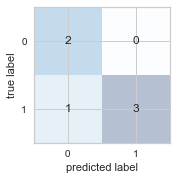

In [89]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

cm = confusion_matrix(y_true, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

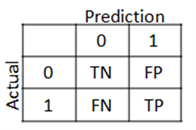

In [98]:
# confusion matrix
Image("../../raw_data/images/confusion_matrix.png", width=300)

##### multilabel  confusion matrix

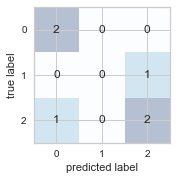

In [87]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

cm = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

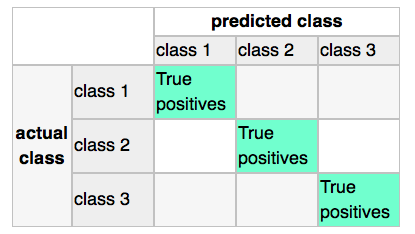

In [100]:
# confusion matrix multiclass
Image("../../raw_data/images/confusion_matrix_multiclass.png", width=400)

### Classification Report

In [104]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [53]:
# separate the features and response
X = df['section_name']
y = df['section_length']
y_class = df['contains_fee']

In [54]:
# develop features from the text data
vect = TfidfVectorizer()
fit_vect = vect.fit_transform(X)

In [55]:
logreg = LogisticRegression()
logreg.fit(fit_vect, y_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
pred_class = logreg.predict(fit_vect)
accuracy_score(pred_class, y_class)

0.94128113879003561

In [10]:
# create a regression model to predict the 
linreg = LinearRegression()
linreg.fit(fit_vect, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
pred = linreg.predict(fit_vect)

In [15]:
np.sqrt(mean_squared_error(pred, y))

1191.579985168627

In [24]:
# baseline accuracy
mean = [y.mean() for _ in range(0,len(y))]

np.sqrt(mean_squared_error(mean, y))

2595.3443201394134